<a href="https://colab.research.google.com/github/SiyiGit/github_actions/blob/main/CNN_model%2004152024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install opendatasets
!pip install opendatasets

In [3]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [4]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:27<00:00, 105MB/s]


In [5]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [6]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
data_dir_test = './new-plant-diseases-dataset/test/test'

In [7]:
## Defining batch specfications
batch_size = 200
img_height = 100
img_width = 100

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn import metrics

In [9]:
# Loading training set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_data = train_datagen.flow_from_directory(data_dir_train,
                                              batch_size=batch_size,
                                              target_size=(img_height, img_width),
                                              class_mode = 'categorical',
                                              shuffle=True)

Found 70295 images belonging to 38 classes.


In [10]:
## loading validation set
valdata_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_data = valdata_generator.flow_from_directory(data_dir_val,
                                            batch_size=batch_size,
                                            target_size=(img_height, img_width),
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 17572 images belonging to 38 classes.


In [ ]:
## Defining model layers
#inputs = Input(shape = (256, 256,3), name = "Input")

#first_layer = Conv2D(filters = 32,
#                     kernel_size = (5, 5),
#                     padding = 'valid',
#                     activation = 'relu')

#second_layer = MaxPooling2D(pool_size = (2, 2))

#third_layer = Dropout(rate = 0.2)

#fourth_layer = Flatten()

#fifth_layer = Dense(units = 128,
#                    activation = 'relu')

#output_layer = Dense(units = 38,
                     activation='softmax')

#x=first_layer(inputs)
#x=second_layer(x)
#x=third_layer(x)
#x=fourth_layer(x)
#x=fifth_layer(x)

#outputs=output_layer(x)

#cnn_model = Model(inputs = inputs, outputs = outputs)



In [23]:
def create_model():
    model = Sequential([
        Conv2D(filters=64, kernel_size=(5, 5), padding='valid', input_shape=(img_width, img_height, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),

        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=128, activation='relu'),
        Dropout(0.5),
        Dense(units=38, activation='sigmoid')
    ])

    return model

In [24]:
cnn_model = create_model()

In [25]:
cnn_model.compile(loss='categorical_crossentropy', # loss function
                  optimizer='adam',                # gradien descent algorithm
                  metrics=['accuracy'])           # accuracy metric)


In [26]:
print(cnn_model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 96, 96, 64)        4864      
                                                                 
 activation_7 (Activation)   (None, 96, 96, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 activation_8 (Activation)   (None, 46, 46, 64)       

In [27]:
training_history = cnn_model.fit(train_data,
                                 validation_data= val_data,
                                 epochs = 8,
                                 batch_size = 200)

Epoch 1/8
352/352 [==============================] - 2574s 7s/step - loss: 2.6063 - accuracy: 0.2920 - val_loss: 6.3391 - val_accuracy: 0.0913
Epoch 2/8
352/352 [==============================] - 2512s 7s/step - loss: 1.6347 - accuracy: 0.5193 - val_loss: 1.6489 - val_accuracy: 0.5393
Epoch 3/8
352/352 [==============================] - 2463s 7s/step - loss: 1.2563 - accuracy: 0.6252 - val_loss: 2.6156 - val_accuracy: 0.4182
Epoch 4/8
352/352 [==============================] - 2441s 7s/step - loss: 1.0215 - accuracy: 0.6941 - val_loss: 2.0112 - val_accuracy: 0.5393
Epoch 5/8
352/352 [==============================] - 2412s 7s/step - loss: 0.8652 - accuracy: 0.7426 - val_loss: 1.3034 - val_accuracy: 0.6577
Epoch 6/8
352/352 [==============================] - 2374s 7s/step - loss: 0.7549 - accuracy: 0.7762 - val_loss: 4.3143 - val_accuracy: 0.3617
Epoch 7/8
352/352 [==============================] - 2372s 7s/step - loss: 0.6669 - accuracy: 0.8038 - val_loss: 4.1201 - val_accuracy: 0.4521

In [29]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

train_loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

#learning_rate = training_history.history['lr']

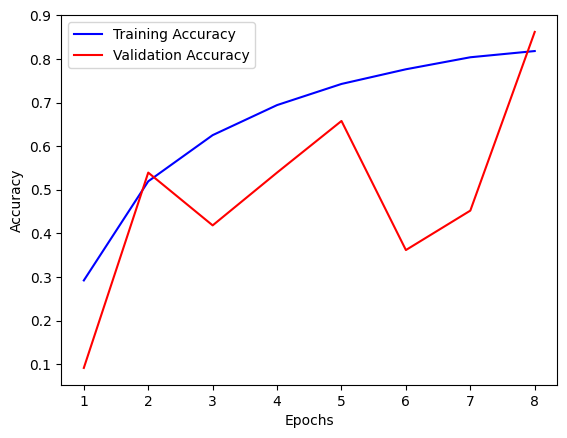

In [31]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.plot(np.arange(1 , 9, 1),
         train_acc,
         label = 'Training Accuracy',
         color = 'blue')


plt.plot(np.arange(1 , 9, 1),
         val_acc,
         label = 'Validation Accuracy',
         color = 'red')

plt.legend()

plt.show()

In [33]:
test_pred = cnn_model.predict(val_data)

test_pred_class = test_pred.argmax(axis = 1)
y_test_class =val_data.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_class))

88/88 [==============================] - 159s 2s/step


AttributeError: 'DirectoryIterator' object has no attribute 'argmax'

In [ ]:
cnn_model.save("model.h5")
from tensorflow.keras.models import load_model

cnn_model = load_model("/kaggle/working/model.h5")